# Course Project: Interview Prepararion

### 1. Views about the problem statement?
Once upon a time in Sydney, there was a small newspaper company called "The Daily Buzz." The Daily Buzz was founded many years ago by a group of journalists and entrepreneurs.
Over the years, The Daily Buzz grew and evolved. One day, the editor-in-chief had a brilliant idea. They would start a new column called "The Weather Oracle," where they would
predict the weather for the coming days.As the popularity of "The Weather Oracle" continued to grow, the editor-in-chief of The Daily Buzz realized that they could further
improve the accuracy of their weather predictions. With this in mind, they decided to hire a machine learning expert to create a machine learning model for rainfall prediction.
The editor-in-chief of "The Daily Buzz.” has hired me and he wants me to create an ML model to accurately predict the rainfall in Sydney. As an ML expert at The Daily Buzz,
they have given me the task to create a ML model to predict the rainfall.


### 2. What will be the approach to solving this task?
* Data Understanding: Begin by thoroughly understanding the given data set.
* Data Preprocessing: Data pre-processing involves cleaning and transforming the data to make it suitable for training
a machine learning model. This can include tasks such a (1)Handling missing values (2)Outlier detection and treatment (3)Handling categorical variables (4)Normalization (5)Feature selection.
* Model Selection: Choose different Classifier models.
* Model Training and Evaluation: (1)Partitioning of data into train and test data (2)Use appropriate evaluation metrics like Confusion matrix and Accuracy score to measure the model's accuracy (3)Select the model with the best performance.
* Model Optimization: Implementation of Decision tree classifier and Ensemble techniques.
* Model Comparision: Compare the performance of different models and select the one with the best accuracy.

In [1]:
# Import numpy for numerical operations
# Import pandas for data manipulation and analysis
# Import seaborn for data visualization

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read the csv file into a dataframe

df = pd.read_csv('/content/sydney_rain prediction.csv')

In [3]:
# Overview of data

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1-2-08,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2-2-08,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,3-2-08,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,4-2-08,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,5-2-08,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


### EDA Analysis

In [4]:
df.shape

(3337, 17)

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [6]:
# Checking null values

df.isnull().sum()

,0
Date,0
Location,0
MinTemp,3
MaxTemp,2
Rainfall,6
Evaporation,51
Sunshine,16
Humidity9am,14
Humidity3pm,13
Pressure9am,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [8]:
# Dropping Data and Location Columns

del df['Date']
del df['Location']

In [9]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [10]:
df.isnull().sum()

,0
MinTemp,3
MaxTemp,2
Rainfall,6
Evaporation,51
Sunshine,16
Humidity9am,14
Humidity3pm,13
Pressure9am,20
Pressure3pm,19
Cloud9am,566


In [11]:
# Treating missing values

df.MinTemp=df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp=df.MaxTemp.fillna(df.MaxTemp.mean())
df.Rainfall=df.Rainfall.fillna(df.Rainfall.mean())
df.Evaporation=df.Evaporation.fillna(df.Evaporation.mean())
df.Sunshine=df.Sunshine.fillna(df.Sunshine.mean())
df.Humidity9am=df.Humidity9am.fillna(df.Humidity9am.mean())
df.Humidity3pm=df.Humidity3pm.fillna(df.Humidity3pm.mean())
df.Pressure9am=df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm=df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Cloud9am=df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm=df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Temp9am=df.Temp9am.fillna(df.Temp9am.mean())
df.Temp3pm=df.Temp3pm.fillna(df.Temp3pm.mean())
df.RainToday=df.RainToday.fillna('Yes')

In [12]:
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
Humidity9am,0
Humidity3pm,0
Pressure9am,0
Pressure3pm,0
Cloud9am,0


In [13]:
# Creating dummy variables

df=pd.get_dummies(df, drop_first=True)
df=df.replace({True:1, False:0})

In [14]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


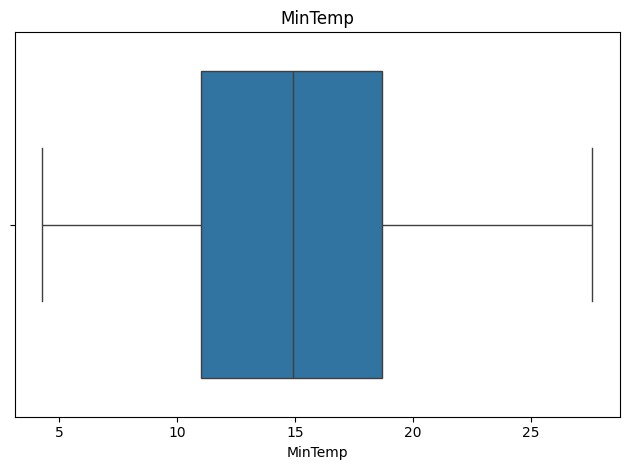

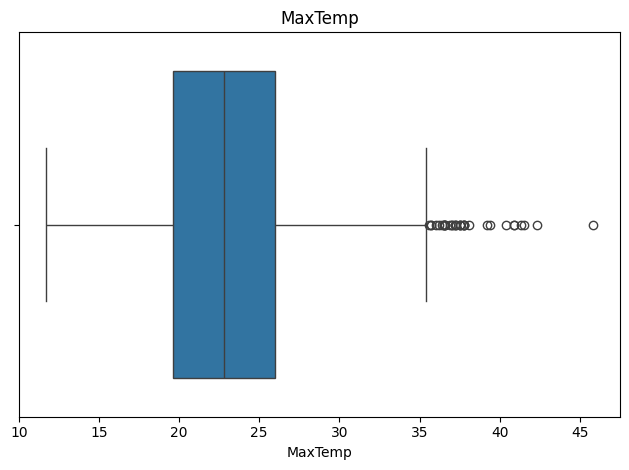

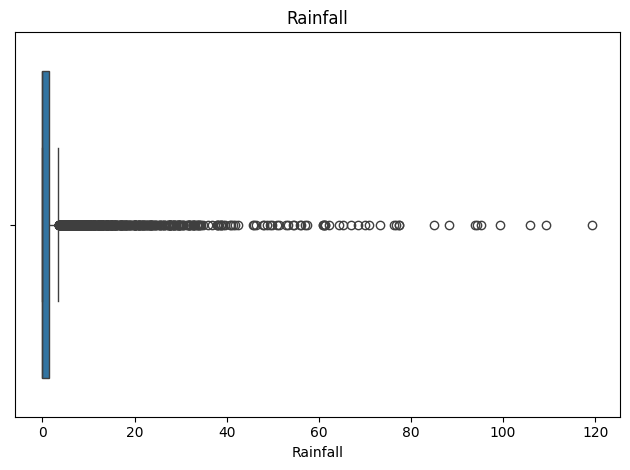

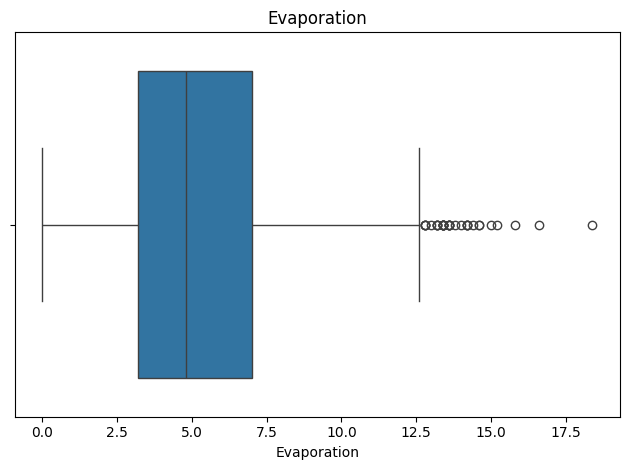

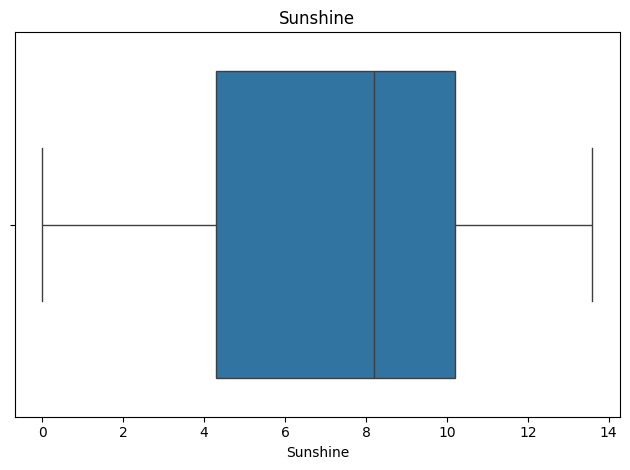

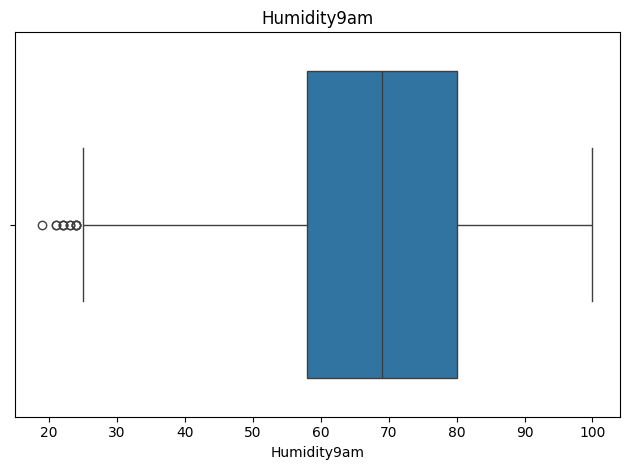

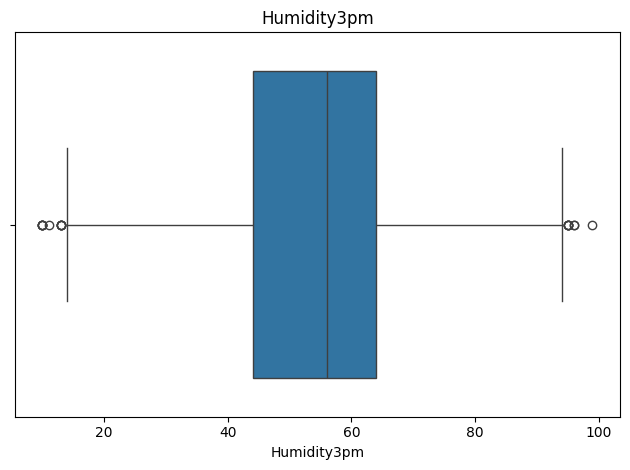

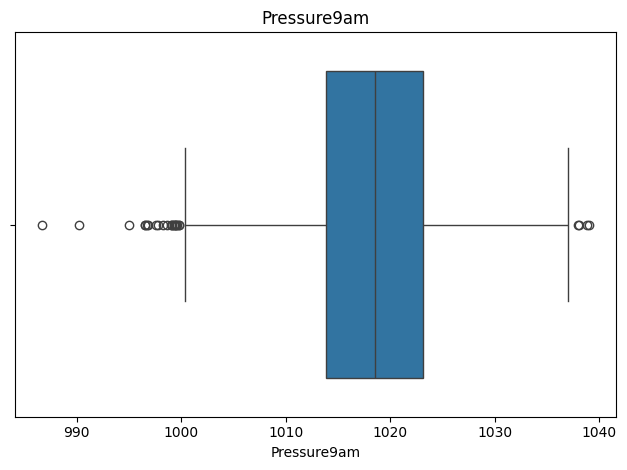

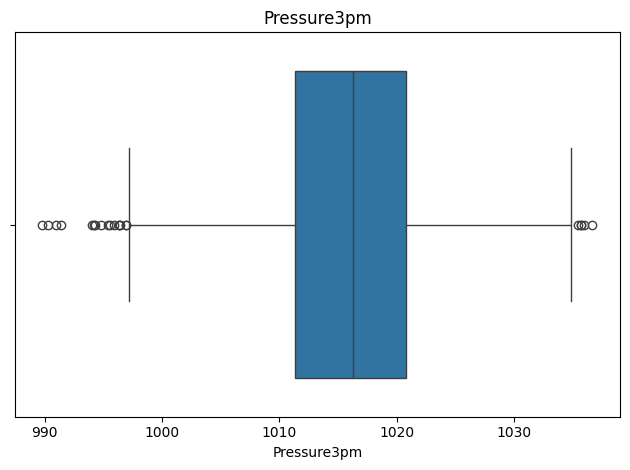

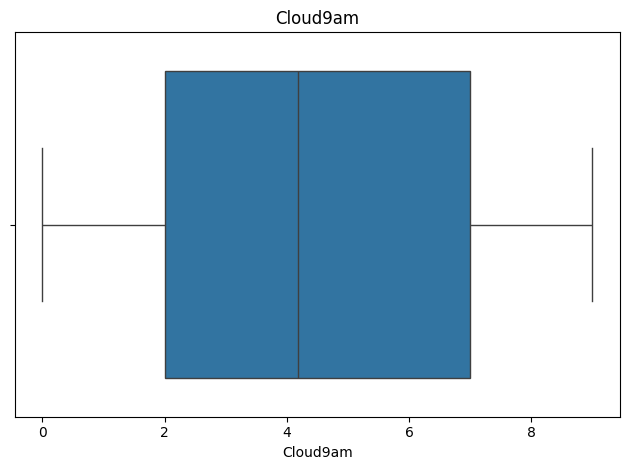

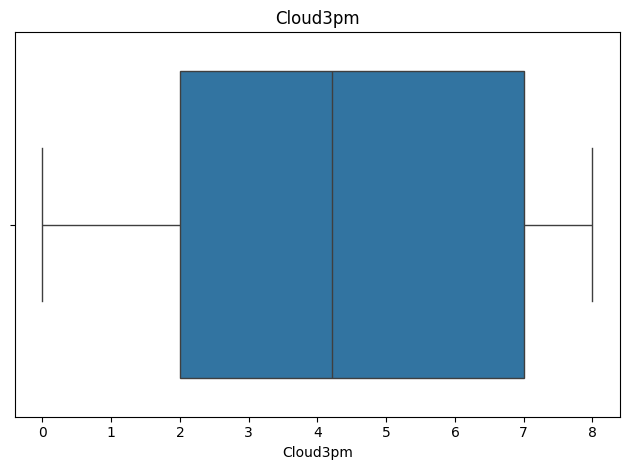

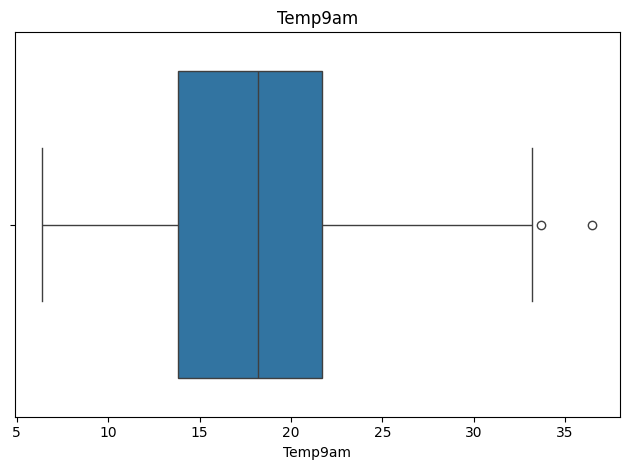

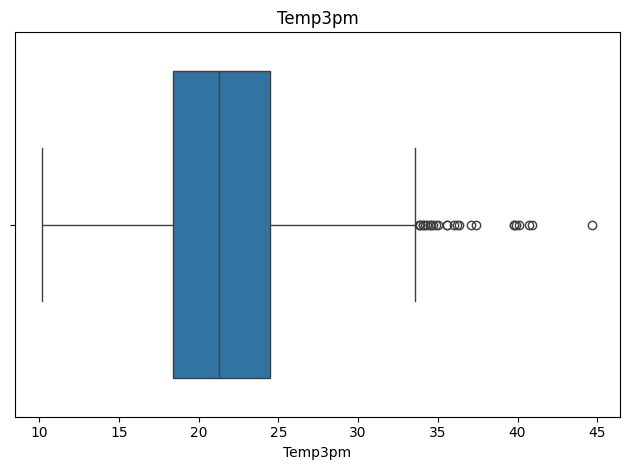

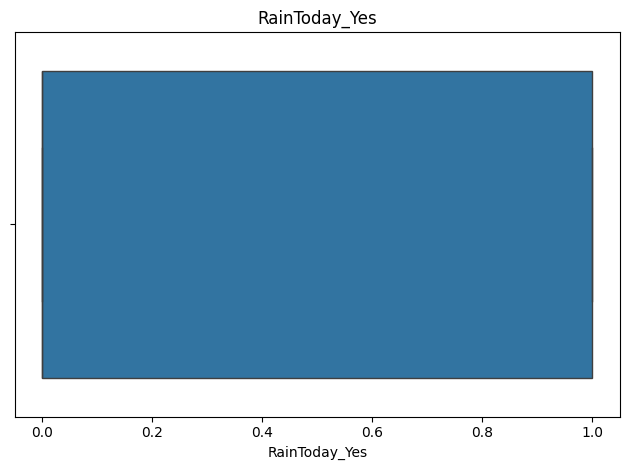

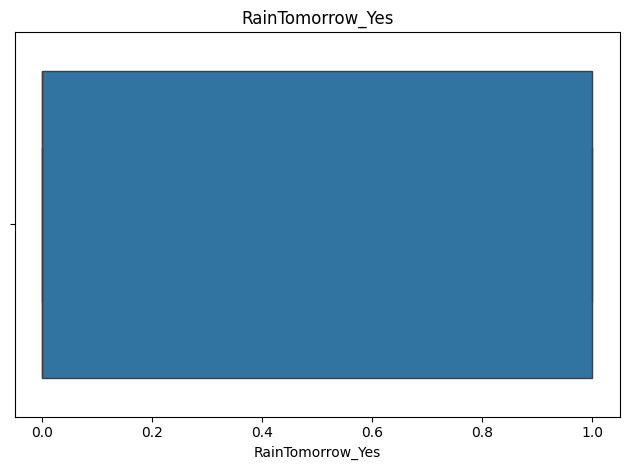

In [15]:
# Outlier detection
# Creating a boxplot for each column

import matplotlib.pyplot as plt
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(col)
  plt.tight_layout()
  plt.show()

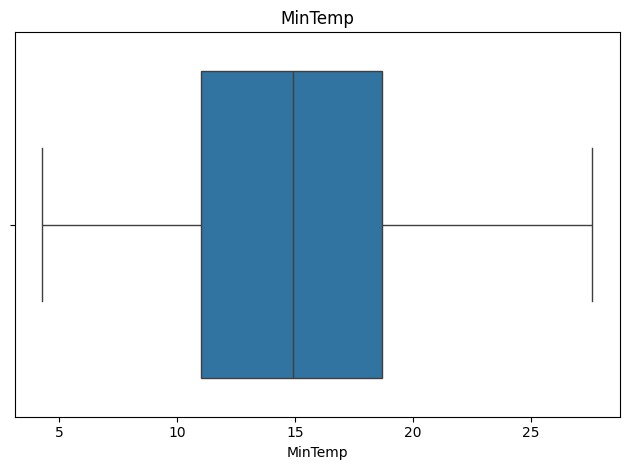

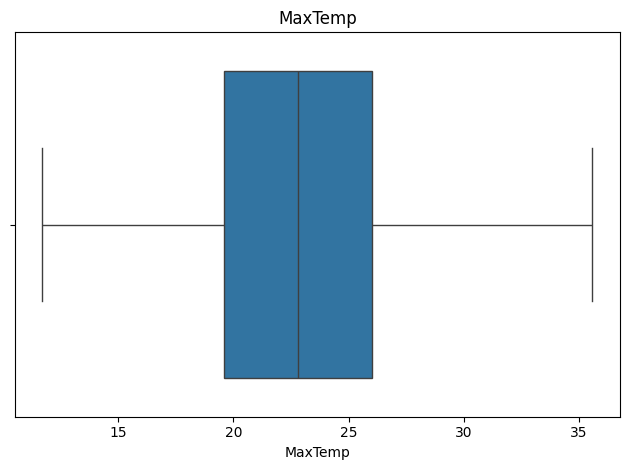

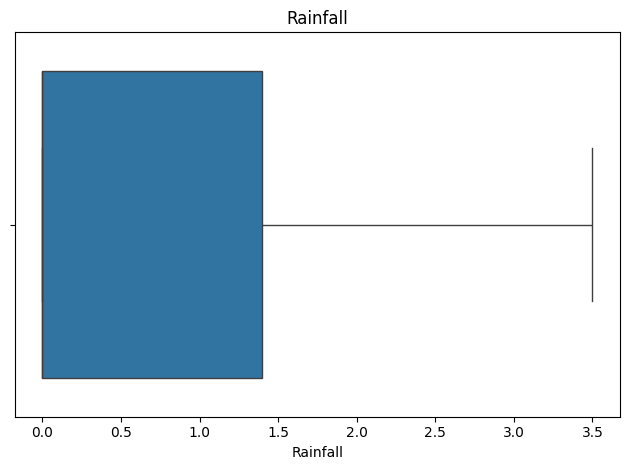

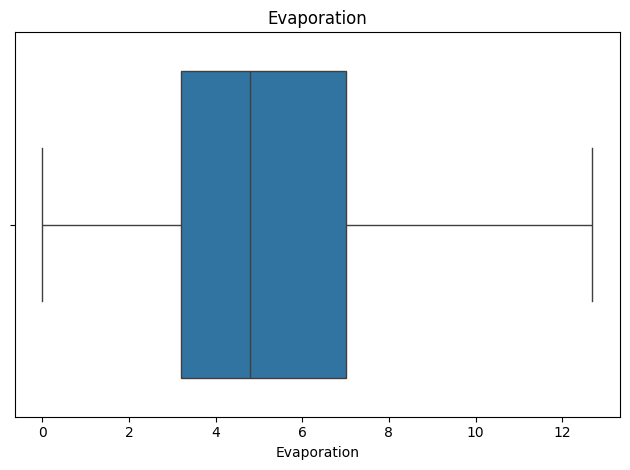

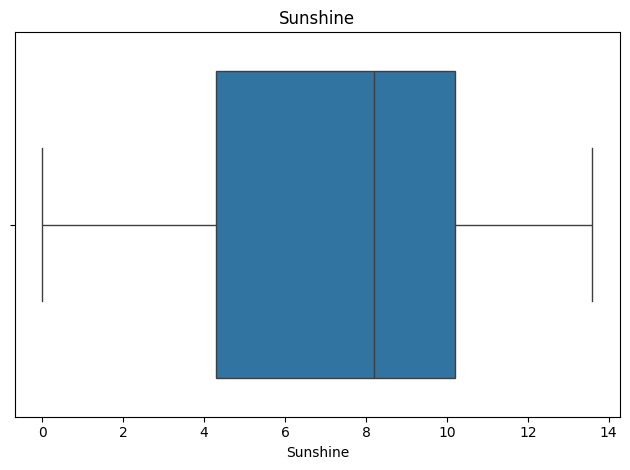

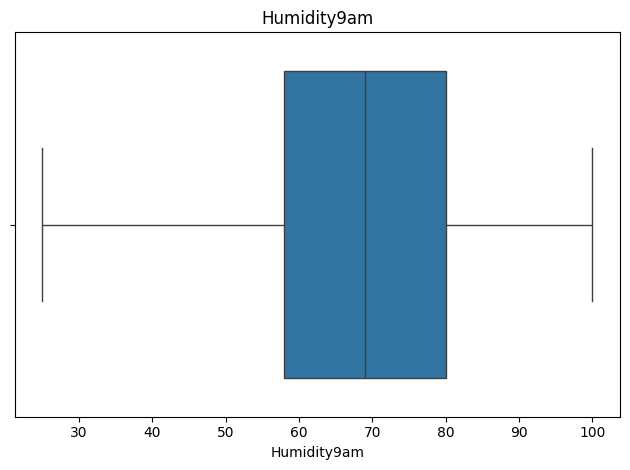

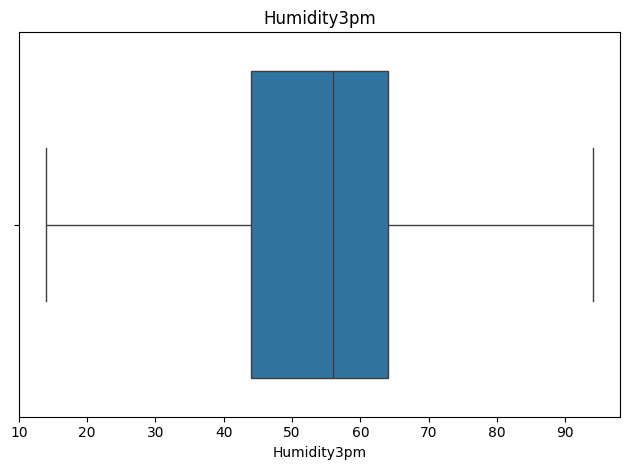

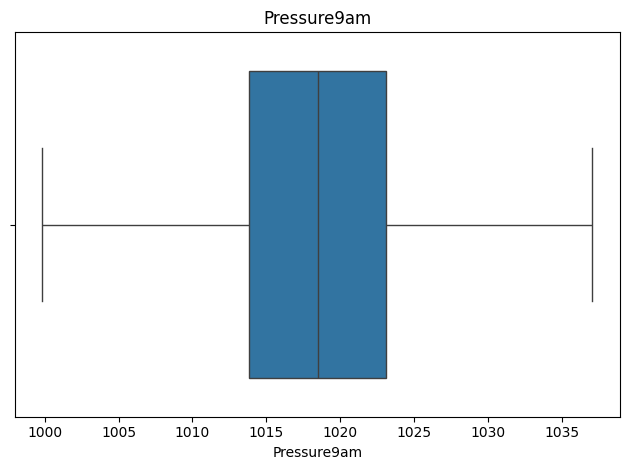

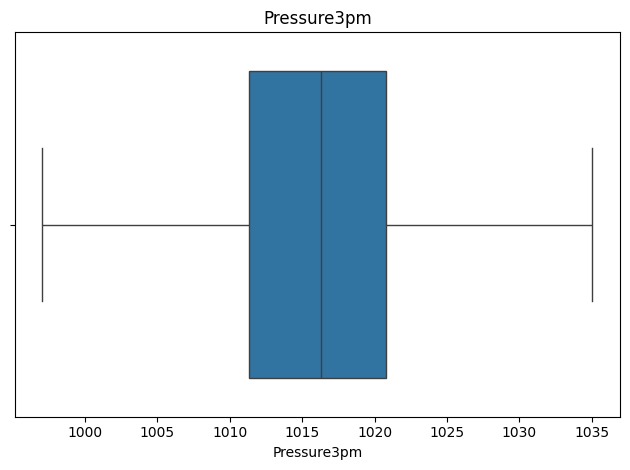

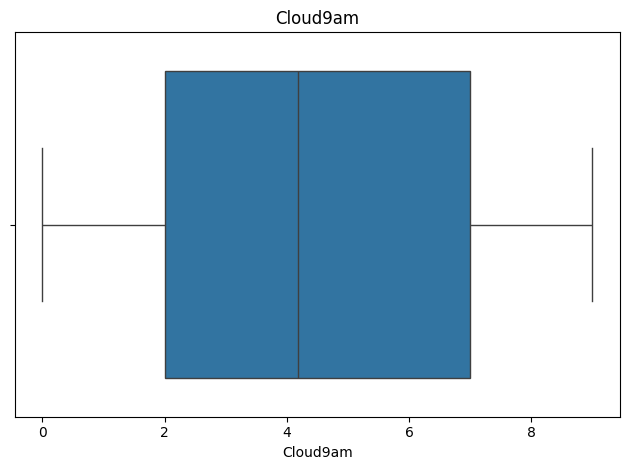

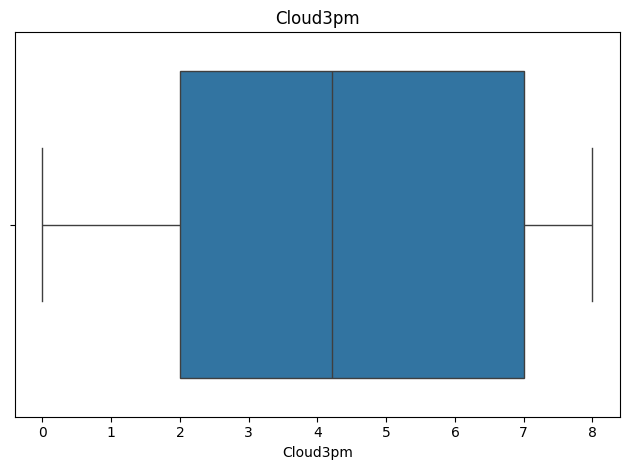

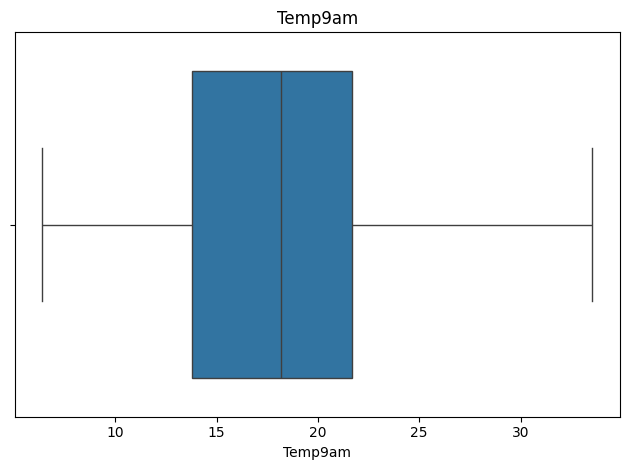

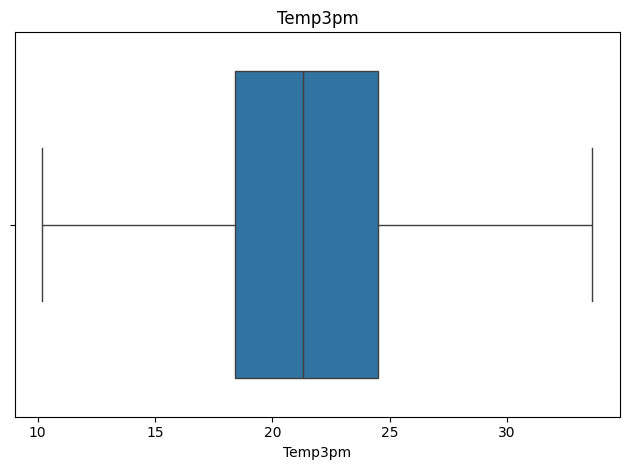

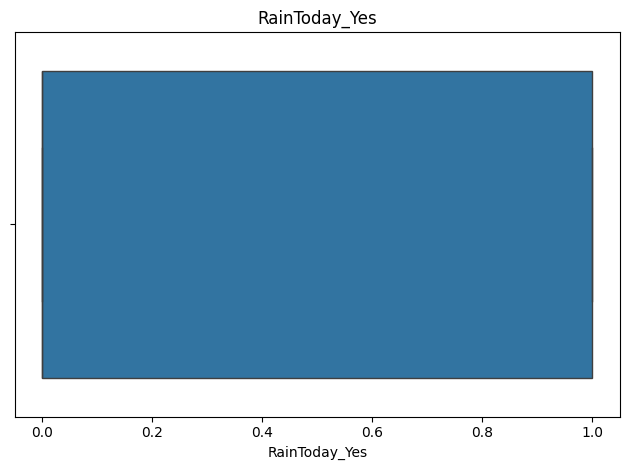

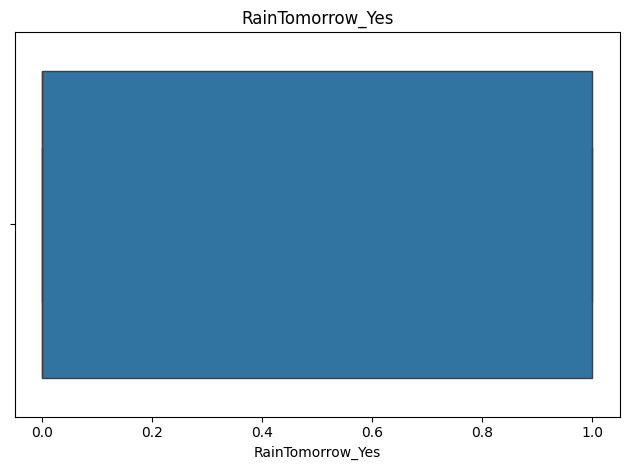

In [16]:
# Outlier Trearment

# Calculate the Interquantile Range(IQR) for each numerical feature
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.75)
IQR = Q2-Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1-(1.5*IQR)
upper_bound = Q2+(1.5*IQR)

# Replace outliers with the lower or upper bounds
for col in df.select_dtypes(include=np.number).columns:
  df[col]=np.where((df[col]<lower_bound[col]), lower_bound[col],df[col])
  df[col]=np.where((df[col]>upper_bound[col]), upper_bound[col],df[col])

# Creating a boxplot for each column
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(col)
  plt.tight_layout()
  plt.show()

In [17]:
# Correlation matrix
corr=df.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.775690,0.023171,0.570698,-0.062959,0.052908,0.271728,-0.395526,-0.357223,0.236288,0.163519,0.939013,0.758371,0.019369,0.079962
MaxTemp,0.775690,1.000000,-0.188239,0.512694,0.328741,-0.183404,-0.144058,-0.390471,-0.425164,-0.088230,-0.101725,0.862195,0.960018,-0.185504,-0.151841
Rainfall,0.023171,-0.188239,1.000000,-0.235492,-0.375991,0.418365,0.354544,-0.008021,0.052547,0.329424,0.263782,-0.072416,-0.189999,0.958585,0.358048
Evaporation,0.570698,0.512694,-0.235492,1.000000,0.177087,-0.394423,-0.101240,-0.345633,-0.302191,-0.037937,-0.038892,0.609323,0.479570,-0.228676,-0.063748
Sunshine,-0.062959,0.328741,-0.375991,0.177087,1.000000,-0.489488,-0.583373,-0.046806,-0.096027,-0.660555,-0.676397,0.114541,0.346971,-0.362846,-0.521637
Humidity9am,0.052908,-0.183404,0.418365,-0.394423,-0.489488,1.000000,0.657988,0.263285,0.252339,0.423909,0.331951,-0.147018,-0.154477,0.396021,0.329345
Humidity3pm,0.271728,-0.144058,0.354544,-0.101240,-0.583373,0.657988,1.000000,0.153133,0.182897,0.454424,0.472158,0.129572,-0.204563,0.339833,0.471827
Pressure9am,-0.395526,-0.390471,-0.008021,-0.345633,-0.046806,0.263285,0.153133,1.000000,0.960806,-0.010435,-0.039749,-0.421709,-0.347228,-0.000117,-0.032176
Pressure3pm,-0.357223,-0.425164,0.052547,-0.302191,-0.096027,0.252339,0.182897,0.960806,1.000000,0.019873,-0.002591,-0.406225,-0.391848,0.056784,0.011403
Cloud9am,0.236288,-0.088230,0.329424,-0.037937,-0.660555,0.423909,0.454424,-0.010435,0.019873,1.000000,0.608995,0.088716,-0.090757,0.314830,0.329525


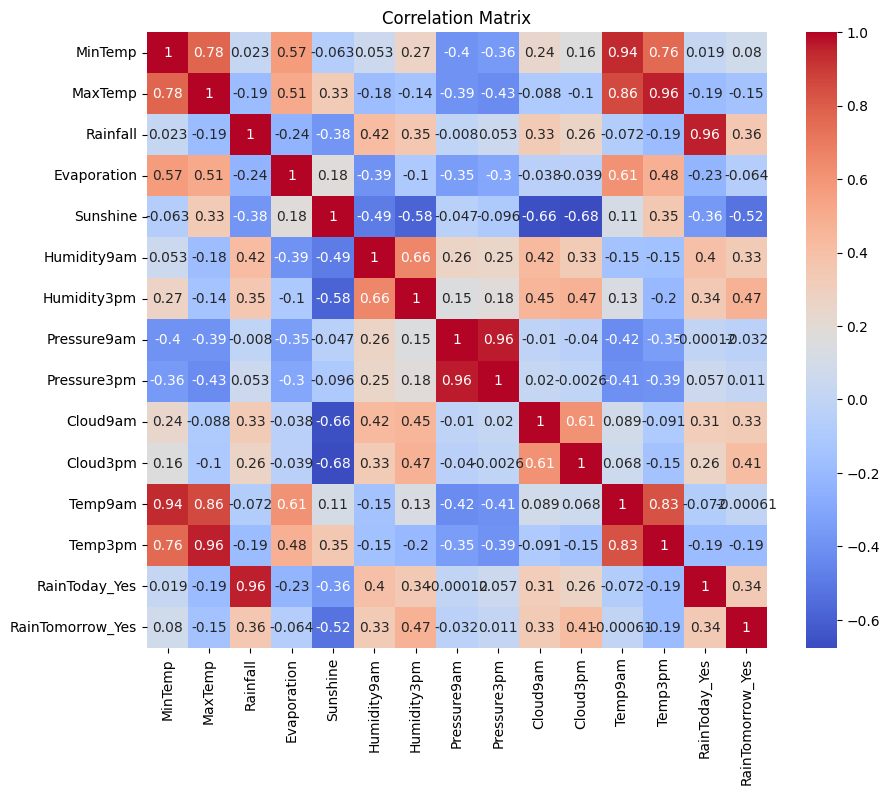

In [18]:
# Creating heatmap

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Logistic Regression

In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x=df.drop('RainTomorrow_Yes', axis=1)
y=df['RainTomorrow_Yes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score

# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, clf.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, clf.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, clf.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, clf.predict(x_test)))

Confusion matrix for train data:
 [[1848  140]
 [ 294  387]]
Accuracy score for train data: 0.8373922817534657
Confusion matrix for test data:
 [[447  37]
 [ 78 106]]
Accuracy score for test data: 0.8278443113772455


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### LinearDiscriminantAnalysis

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(x_train, y_train)

# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, lda.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, lda.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, lda.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, lda.predict(x_test)))

Confusion matrix for train data:
 [[1823  165]
 [ 281  400]]
Accuracy score for train data: 0.8328962158111652
Confusion matrix for test data:
 [[441  43]
 [ 76 108]]
Accuracy score for test data: 0.8218562874251497


### KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# standardize the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# Create a KNN Classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(x_train_s, y_train)

# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, knn.predict(x_train_s)))
print('Accuracy score for train data:',accuracy_score(y_train, knn.predict(x_train_s)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, knn.predict(x_test_s)))
print('Accuracy score for test data:',accuracy_score(y_test, knn.predict(x_test_s)))

Confusion matrix for train data:
 [[1888  100]
 [ 262  419]]
Accuracy score for train data: 0.8643686774072686
Confusion matrix for test data:
 [[431  53]
 [ 76 108]]
Accuracy score for test data: 0.8068862275449101


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {'n_neighbors': range(1,20)}

# Create a KNN Classifier Object
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_s, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
knn_best = grid_search.best_estimator_

print('Best parameters:', best_params)
print('knn_best:', knn_best)

Best parameters: {'n_neighbors': 15}
knn_best: KNeighborsClassifier(n_neighbors=15)


In [23]:
# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, knn_best.predict(x_train_s)))
print('Accuracy score for train data:',accuracy_score(y_train, knn_best.predict(x_train_s)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, knn_best.predict(x_test_s)))
print('Accuracy score for test data:',accuracy_score(y_test, knn_best.predict(x_test_s)))

Confusion matrix for train data:
 [[1884  104]
 [ 314  367]]
Accuracy score for train data: 0.8433870363431997
Confusion matrix for test data:
 [[442  42]
 [ 84 100]]
Accuracy score for test data: 0.811377245508982


### Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dtree = DecisionTreeClassifier()

# Fit the data
dtree.fit(x_train, y_train)

# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, dtree.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, dtree.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, dtree.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, dtree.predict(x_test)))

Confusion matrix for train data:
 [[1988    0]
 [   0  681]]
Accuracy score for train data: 1.0
Confusion matrix for test data:
 [[412  72]
 [ 72 112]]
Accuracy score for test data: 0.7844311377245509


In [25]:
# Perform grid search cross-validation
param_grid = {'max_depth': range(1,20)}

# Perform grid search cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
dtree_best = grid_search.best_estimator_

print('Best parameters:', best_params)
print('dtree_best:', dtree_best)

Best parameters: {'max_depth': 4}
dtree_best: DecisionTreeClassifier(max_depth=4)


In [26]:
# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, dtree_best.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, dtree_best.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, dtree_best.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, dtree_best.predict(x_test)))

Confusion matrix for train data:
 [[1881  107]
 [ 311  370]]
Accuracy score for train data: 0.8433870363431997
Confusion matrix for test data:
 [[442  42]
 [ 87  97]]
Accuracy score for test data: 0.8068862275449101


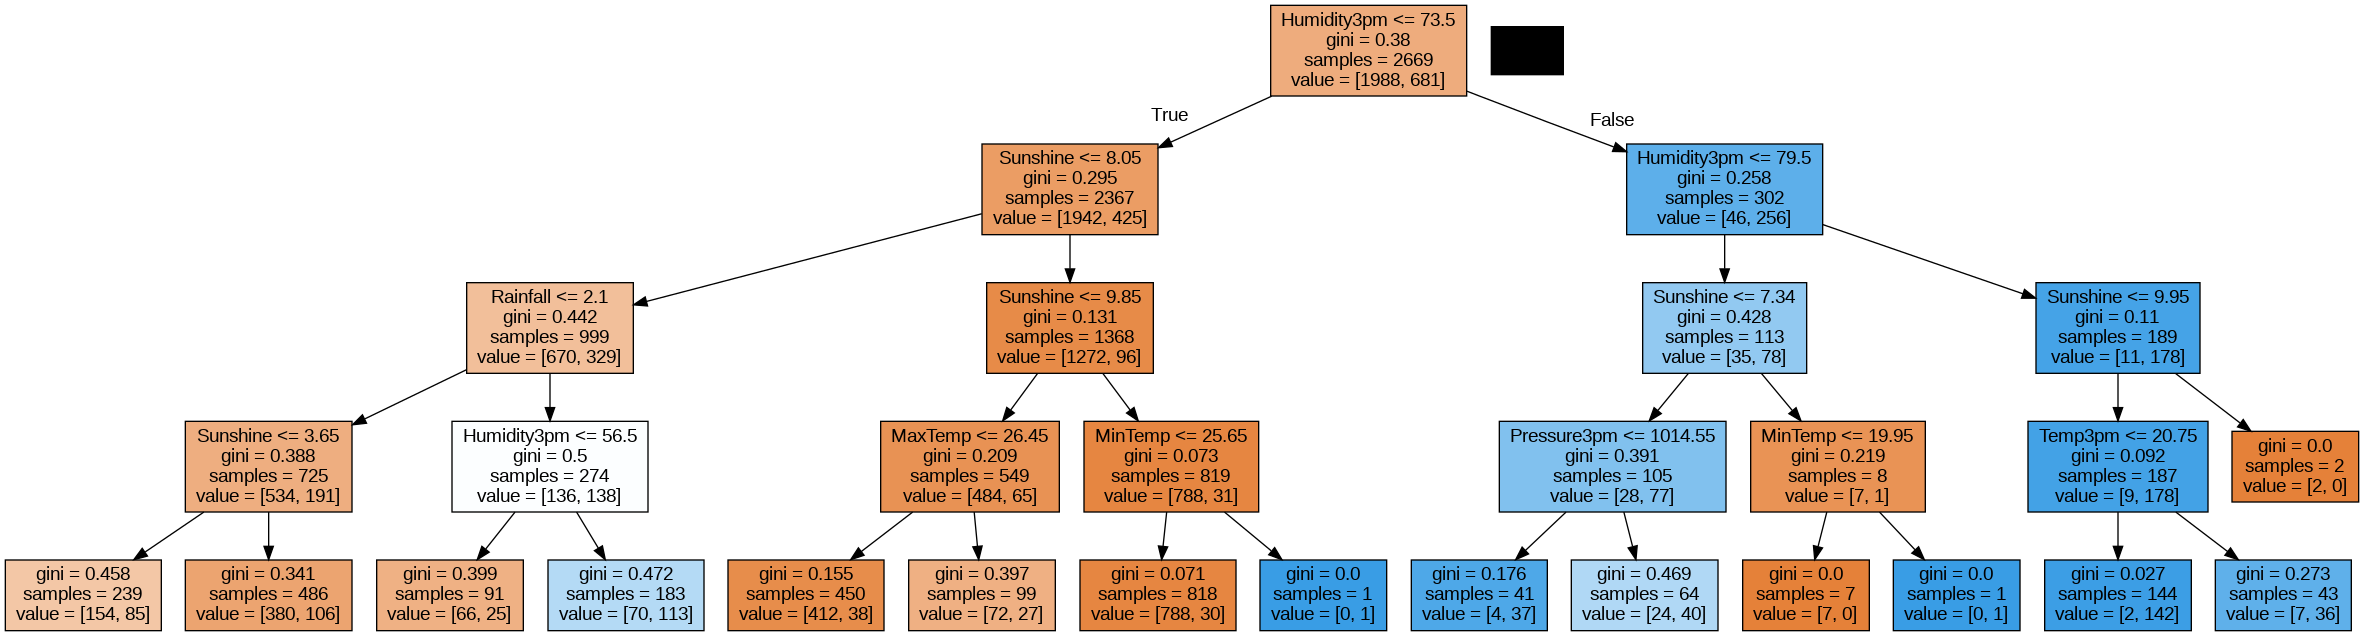

In [27]:
# Plotting decision tree

from sklearn import tree
dot_data = tree.export_graphviz(dtree_best, out_file=None, feature_names=x_train.columns, filled=True)
from IPython.display import Image
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Bagging Classifier

In [28]:
from sklearn.ensemble import BaggingClassifier

# Create a BagginghClassifier object
bag_clf = BaggingClassifier(n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

# Fit the data
bag_clf.fit(x_train, y_train)

# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, bag_clf.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, bag_clf.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, bag_clf.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, bag_clf.predict(x_test)))

Confusion matrix for train data:
 [[1988    0]
 [   0  681]]
Accuracy score for train data: 1.0
Confusion matrix for test data:
 [[444  40]
 [ 78 106]]
Accuracy score for test data: 0.8233532934131736


### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

# Fit the data
rf_clf.fit(x_train, y_train)

# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, rf_clf.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, rf_clf.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, rf_clf.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, rf_clf.predict(x_test)))

Confusion matrix for train data:
 [[1988    0]
 [   0  681]]
Accuracy score for train data: 1.0
Confusion matrix for test data:
 [[451  33]
 [ 80 104]]
Accuracy score for test data: 0.8308383233532934


In [ ]:
# Perform grid search cross-validation
param_grid = {'max_depth': [2,3,4], 'n_estimators': [500,800,1000], 'min_samples_split': [2,5,10]}

# Perform grid search cross-validation
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
rf_best = grid_search.best_estimator_

print('Best parameters:', best_params)
print('rf_best:', rf_best)

In [33]:
# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, rf_best.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, rf_best.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, rf_best.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, rf_best.predict(x_test)))

Confusion matrix for train data:
 [[1935   53]
 [ 347  334]]
Accuracy score for train data: 0.8501311352566504
Confusion matrix for test data:
 [[462  22]
 [ 94  90]]
Accuracy score for test data: 0.8263473053892215


### Gradient boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier object
gbc_clf = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)

# Fit the data
gbc_clf.fit(x_train, y_train)

# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, gbc_clf.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, gbc_clf.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, gbc_clf.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, gbc_clf.predict(x_test)))

Confusion matrix for train data:
 [[1906   82]
 [ 325  356]]
Accuracy score for train data: 0.8475084301236419
Confusion matrix for test data:
 [[456  28]
 [ 88  96]]
Accuracy score for test data: 0.8263473053892215


In [34]:
# Perform grid search cross-validation
param_grid = {'max_depth': [1,2,3], 'n_estimators': [500,800,1000], 'learning_rate': [0.02,0.05,0.1]}

# Perform grid search cross-validation
grid_search = GridSearchCV(gbc_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
gbc_best = grid_search.best_estimator_

print('Best parameters:', best_params)
print('gbc_best:', gbc_best)

Best parameters: {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 800}
gbc_best: GradientBoostingClassifier(learning_rate=0.05, max_depth=1, n_estimators=800)


In [35]:
# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, gbc_best.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, gbc_best.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, gbc_best.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, gbc_best.predict(x_test)))

Confusion matrix for train data:
 [[1906   82]
 [ 314  367]]
Accuracy score for train data: 0.8516298239040839
Confusion matrix for test data:
 [[456  28]
 [ 85  99]]
Accuracy score for test data: 0.8308383233532934


### Ada Boost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

# Create a AdaBoostClassifier object
ada_clf = AdaBoostClassifier(rf_clf,learning_rate=0.02, n_estimators=500)

# Fit the data
ada_clf.fit(x_train, y_train)

# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, ada_clf.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, ada_clf.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, ada_clf.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, ada_clf.predict(x_test)))

Confusion matrix for train data:
 [[1988    0]
 [   0  681]]
Accuracy score for train data: 1.0
Confusion matrix for test data:
 [[451  33]
 [ 80 104]]
Accuracy score for test data: 0.8308383233532934


In [37]:
# Perform grid search cross-validation
param_grid = {'n_estimators': [500,800,1000], 'learning_rate': [0.02,0.05,0.1]}

# Perform grid search cross-validation
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
ada_best = grid_search.best_estimator_

print('Best parameters:', best_params)
print('ada_best:', ada_best)

Best parameters: {'learning_rate': 0.05, 'n_estimators': 1000}
ada_best: AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                    n_jobs=-1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=1000)


In [38]:
# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, ada_best.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, ada_best.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, ada_best.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, ada_best.predict(x_test)))

Confusion matrix for train data:
 [[1988    0]
 [   0  681]]
Accuracy score for train data: 1.0
Confusion matrix for test data:
 [[453  31]
 [ 81 103]]
Accuracy score for test data: 0.8323353293413174


### XG Boost

In [39]:
import xgboost as xgb

# Create a XGBClassifier object
xgb_clf = xgb.XGBClassifier(learning_rate=0.02, n_estimators=10000, max_depth=5, n_jobs=-1)

# Fit the data
xgb_clf.fit(x_train, y_train)

# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, xgb_clf.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, xgb_clf.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, xgb_clf.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, xgb_clf.predict(x_test)))

Confusion matrix for train data:
 [[1988    0]
 [   0  681]]
Accuracy score for train data: 1.0
Confusion matrix for test data:
 [[435  49]
 [ 73 111]]
Accuracy score for test data: 0.8173652694610778


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

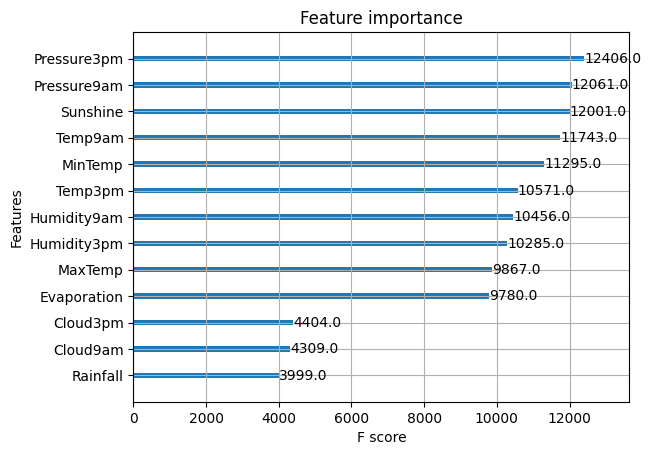

In [40]:
xgb.plot_importance(xgb_clf)

In [41]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.02, n_estimators=250, n_jobs=-1, random_state=42)

# Perform grid search cross-validation
param_test1 = {'max_depth': [5,6,7,8], 'gamma': [0.1,0.2,0.3], 'subsample': [0.8,0.9], 'colsample_bytree': [0.8,0.9], 'reg_alpha': [1e-2,0.1,1]}

# Perform grid search cross-validation
grid_search = GridSearchCV(xgb_clf, param_test1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
xgb_best = grid_search.best_estimator_

print('Best parameters:', best_params)
print('xgb_best:', xgb_best)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 6, 'reg_alpha': 0.01, 'subsample': 0.9}
xgb_best: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)


In [42]:
# Evaluate the model on training set
print('Confusion matrix for train data:\n',confusion_matrix(y_train, xgb_best.predict(x_train)))
print('Accuracy score for train data:',accuracy_score(y_train, xgb_best.predict(x_train)))

# Evaluate the model on test set
print('Confusion matrix for test data:\n',confusion_matrix(y_test, xgb_best.predict(x_test)))
print('Accuracy score for test data:',accuracy_score(y_test, xgb_best.predict(x_test)))

Confusion matrix for train data:
 [[1963   25]
 [ 179  502]]
Accuracy score for train data: 0.9235668789808917
Confusion matrix for test data:
 [[445  39]
 [ 77 107]]
Accuracy score for test data: 0.8263473053892215


### 3. What were the available ML model options that had to be performed in this task?
* Logistic Regression
* LinearDiscriminantAnalysis
* KNeighborsClassifier
* DecisionTreeClassifier
* Bagging
* Random Forest
* Gradient Boosting
* Ada Boost
* XG Boost

### 4. Which model's performance is best and what could be the possible reason for that?
GradientBoostingClassifier with GridSearchCV model's performance is the best in this task. It has given highest accuracy
score out of all model's. Accuracy score for train data: 0.8516298239040839, Accuracy score for test data: 0.8308383233532934.
GradientBoostingClassifier builds models sequentially, where each model attempts to correct the errors made by the previous one.
This gradual improvement leads to highly accurate predictions by reducing bias and variance.

### 5. What steps can be taken to improve the selected model's performance even further?
* Hyperparameter tuning: Perform more thorough hyprparamter tuning . Optimizing model parameters to find the best configuration
for the data. GridSearchCV can help find the optimal combination of hyperparameters. By using GridSearchCV the model's performance
can be improved even further.

* Cross-validation: Use Cross-validation techniques to evaluate model's performance and avoid overfitting.